<h2> Red wine data analysis </h2>

<h2> Data understanding </h2>


Provided are the links to the source of our datasets:

https://www.kaggle.com/zynicide/wine-reviews/version/4
https://archive.ics.uci.edu/ml/datasets/wine

The business tells us the variables in the reviews dataset are:<br/>
1 - country<br/>
2 - description<br/>
3 - designation<br/>
4 - points<br/>
5 - price<br/>
6 - province <br/>
7 - region_1<br/>
8 - region_2<br/>
9 - taster_name<br/>
10 - taster_twitter_handle<br/>
11 - title <br/>
12 - variety<br/>
13 - winery<br/>
<br/>
The business does not know if all variables are relevant in deciding the points score of the wine.<br/>

We import some libraries and the dataset to examine the data through code

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:

dfReviews = pd.read_csv("datasets/winemag-data-130k-v2.csv")

A first look at the dataset:

In [16]:
dfReviews.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


At first glance we can see a wide range of countries and regions. It will be interesting to see if we can find a link between the assigned points of the wine, and where it's from.

<h3>Target and feature variables</h3>

All the columns describing the origin of the wine and the category will be considered as a feature variable. The column 'points' represents the target variable we want to predict.

In [17]:
feature_vars_reviews = ['country','designation', 'price','province','region_1','region_2','variety','winery']
target_var_reviews = ['points']
feature_target_vars_reviews = ['country','designation', 'price','province','region_1','region_2','variety','winery','points']

<h3>Scales of measurements</h3>

To construct an appropiate model it's necessary to have a understanding of all the scales of measurements for the target and feature variables.

In [18]:
nom, disc, cont = 'Nominal', 'Discrete', 'Continous'
var_scale = [nom,nom,cont,nom,nom,nom,nom,nom,disc]
measurement_scales = pd.DataFrame(index=dfReviews[feature_target_vars_reviews].columns, data =var_scale, columns =['Scale_of_measurement'])
measurement_scales

,Scale_of_measurement
country,Nominal
designation,Nominal
price,Continous
province,Nominal
region_1,Nominal
region_2,Nominal
variety,Nominal
winery,Nominal
points,Discrete


Above we can see that most of the feature variables are nominal, with the exception bein price which is continious. Our target variable is discrete.

<h3>Correlations</h3>

Below we check the direct correlation between price and point in a scatterplot. Since these are our only numeric values in de dataset.

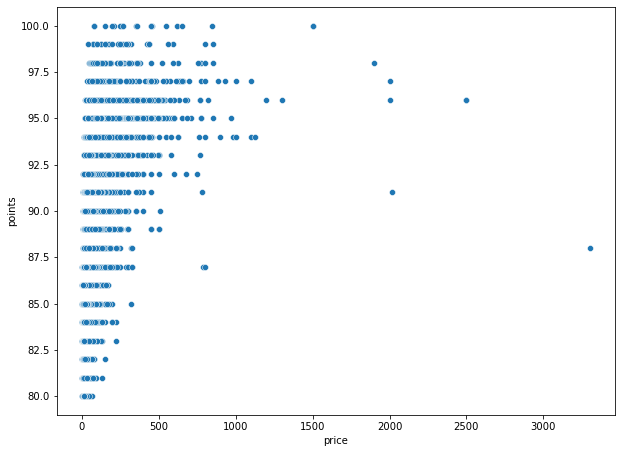

In [19]:
corr = dfReviews[feature_target_vars_reviews].corr()
plt.figure(figsize=(10,7.5))
sns.scatterplot(data = dfReviews, x='price', y='points')
plt.show()

In [20]:
corr.round(2)

,price,points
price,1.00,0.42
points,0.42,1.00


In the scatterplot above we can see some interesting findings. If we look at the price between the 500 and 100 it's very difficult to find a wine with points lower than 90. There are ofcourse plenty of wines that score 90 or higher that are below the 500 price mark, but the chance of finding one below 90 is also a lot higher. 
From this graph we find out that most of the time, the higher you go in price, the more sure you can be of the quality. an interesting finding to take into our model. The correlating number is 0.42 which means there certainly is some form of correlation.

<h2>Data preparation</h2>

Here is an overview of datatypes:

In [21]:
dfReviews[feature_target_vars_reviews].dtypes

country         object
designation     object
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
points           int64
dtype: object

As expected from our scale of measurment earlier; the points are integers and the prices are floats. All our other features are objects. lets convert them to strings.

In [22]:
dfReviews = dfReviews[feature_target_vars_reviews].convert_dtypes()
dfReviews.dtypes

country        string
designation    string
price           Int64
province       string
region_1       string
region_2       string
variety        string
winery         string
points          Int64
dtype: object

<h3>Dropping NA price values</h3>

Since price is our only numeric value and has quite a strong correlation with our target variable, we are gonna drop all the rows that don't have that included. 8996 rows will be deleted.

In [23]:
dfReviews['price'].isna().sum()

8996

In [24]:
dfReviews = dfReviews.dropna(subset=['price'])

In [25]:
dfReviews['price'].isna().sum()

0

<h3> Dropping unneeded columns </h3>

Earlier we kept using dfReviews[feature_target_vars_reviews] to show all the variables we uses. now we make that our standard dataset to make the modelling process easier.

In [26]:
dfReviews = dfReviews[feature_target_vars_reviews]